# 0 - Importando as biblioteca necessárias

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1.a - Abrindo uma imagem

In [2]:

# Load an color image in grayscale
img = cv2.imread('rato.png')

# uma imagem é uma matrix de pixels
print(img)

[[[252 255 255]
  [252 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 255 255]
  [252 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 255 255]
  [252 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[148 169 182]
  [151 172 184]
  [165 181 195]
  ...
  [254 255 255]
  [255 255 255]
  [252 255 254]]

 [[106 142 152]
  [133 168 178]
  [156 184 196]
  ...
  [244 246 246]
  [251 254 253]
  [255 255 255]]

 [[104 139 149]
  [109 144 154]
  [118 146 158]
  ...
  [233 236 235]
  [249 251 251]
  [255 255 255]]]


# 2.a Observando os elementos da imagem

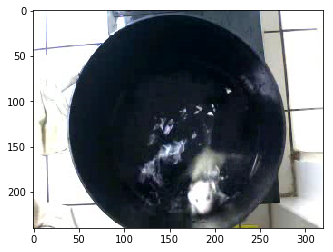

In [3]:
# dois instrumentos de vizualização
# grafico no qual adiciona cores aos elementos do array
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb) #  b g r  

plt.show()

# 2.b Visualização, histograma

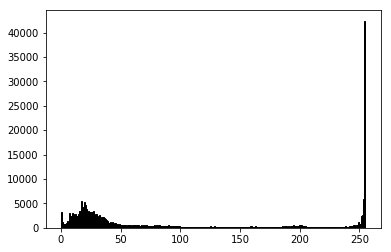

In [4]:
# Histrograma que mostra a quantidade de valores para cada numero
plt.hist(im_rgb.ravel(), bins=256, fc='k', ec='k') #calculating histogram

plt.show()

# 3.a Subtraindo uma imagem da outra

In [5]:
img_fundo = cv2.imread('fundo.png')
img_fundo_convertida = cv2.cvtColor(img_fundo, cv2.COLOR_BGR2RGB)




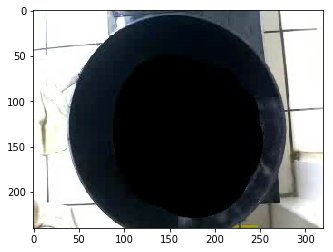

In [6]:
plt.imshow(img_fundo_convertida) #  b g r  

plt.show()

In [7]:
img_subtraida = cv2.absdiff(img, img_fundo_convertida)

print(img_subtraida)

[[[ 0  0  1]
  [ 0  0  1]
  [ 3  0  1]
  ...
  [ 1  1  3]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  1]
  [ 0  0  1]
  [ 3  0  1]
  ...
  [ 1  1  3]
  [ 0  0  1]
  [ 0  0  1]]

 [[ 0  0  1]
  [ 0  0  1]
  [ 3  0  1]
  ...
  [ 1  1  3]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[31  7 41]
  [35  3 36]
  [33  2 32]
  ...
  [ 1  1 10]
  [ 0  0  6]
  [ 3  0  5]]

 [[60  8 24]
  [40 12 43]
  [27 16 48]
  ...
  [ 1  1 13]
  [ 2  1 10]
  [ 0  0  8]]

 [[49  3 35]
  [52  0 32]
  [47  4 28]
  ...
  [ 1  0 11]
  [ 1  1 11]
  [ 0  0  8]]]


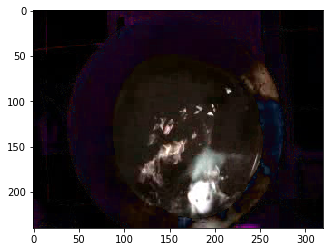

In [8]:
plt.imshow(img_subtraida) #  b g r  

plt.show()

# 4.a Conversão de uma imagem para a escala de cinza

In [9]:
img_subtraida_gray= cv2.cvtColor(img_subtraida, cv2.COLOR_RGB2GRAY)





## Visualização

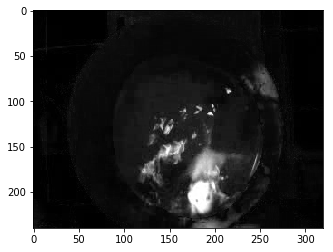

In [10]:
# print(thresh1)
plt.imshow(img_subtraida_gray, cmap='gray', vmin = 0, vmax = 255)

plt.show()

## Visualização, histograma

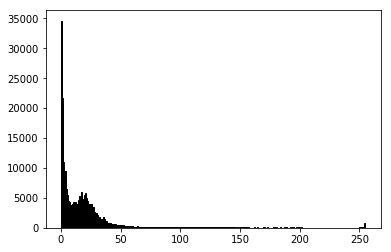

In [11]:
# gray_mostra= cv2.cvtColor(thresh1, cv2.COLOR_GRAY2RGB)
plt.hist(img_subtraida.ravel(), bins=256, fc='k', ec='k') #calculating histogram

plt.show()


# 5.a Limiarizando

In [12]:
ret, img_subtraida_gray_threshold = cv2.threshold(img_subtraida_gray, 100, 255, cv2.THRESH_BINARY) 




## Visualização

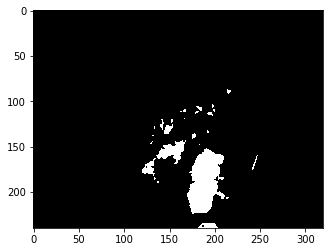

In [13]:
plt.imshow(img_subtraida_gray_threshold, cmap='gray', vmin = 0, vmax = 255)

plt.show()

# Filtro de forma

## 6.a Erosão

In [14]:
kernel = np.ones((10,10), np.uint8) 
img_erosion = cv2.erode(img_subtraida_gray_threshold, kernel, iterations=1) 

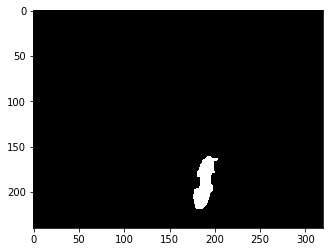

In [15]:
plt.imshow(img_erosion, cmap='gray', vmin = 0, vmax = 255)

plt.show()

# 6.b Dilatação

In [16]:
kernel = np.ones((9,9), np.uint8) 
img_erosion_dilate = cv2.dilate(img_erosion, kernel, iterations=1) 

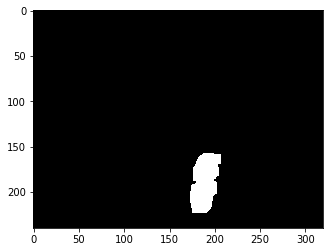

In [17]:
# https://stackoverflow.com/questions/51303361/color-rgb2gray-gives-none-grayscale-image-might-be-an-issue-with-jupyter-notebo
plt.imshow(img_erosion_dilate, cmap='gray', vmin = 0, vmax = 255)

plt.show()

# 7.a Encontra o contorno


In [18]:
contours, hierarchy = cv2.findContours(img_erosion_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

[array([[[188, 157]],

       [[185, 160]],

       [[184, 160]],

       [[182, 162]],

       [[182, 163]],

       [[181, 164]],

       [[181, 165]],

       [[180, 166]],

       [[180, 168]],

       [[179, 169]],

       [[179, 171]],

       [[177, 173]],

       [[177, 187]],

       [[179, 187]],

       [[180, 188]],

       [[180, 189]],

       [[179, 190]],

       [[179, 191]],

       [[178, 192]],

       [[176, 192]],

       [[175, 193]],

       [[174, 193]],

       [[174, 198]],

       [[173, 199]],

       [[173, 211]],

       [[174, 212]],

       [[174, 217]],

       [[175, 218]],

       [[175, 221]],

       [[176, 222]],

       [[191, 222]],

       [[195, 218]],

       [[195, 217]],

       [[196, 216]],

       [[196, 213]],

       [[197, 212]],

       [[197, 210]],

       [[198, 209]],

       [[198, 205]],

       [[201, 202]],

       [[202, 202]],

       [[202, 189]],

       [[201, 188]],

       [[200, 188]],

       [[199, 187]],

       [[

# 7.6 Desenhando o contorno

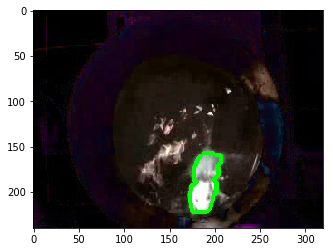

In [19]:
cv2.drawContours(img_subtraida, contours, -1, (0,255,0), 3)

plt.imshow(img_subtraida, cmap='gray', vmin = 0, vmax = 255)

plt.show()

# Realize o processamento do vídeo

Utilize as técnias ensinadas para segmentar o animal no vídeo 1e3z1h4.avi e encontrar o contorno dele.
